In [1]:
import torch

In [2]:
from tokenizers import Tokenizer

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tokenizer

In [9]:
model_name = "gpt2"

In [10]:
tokenizer = Tokenizer.from_pretrained(model_name)

## Test text

In [11]:
test_txt = "Your journey starts with one step"

In [12]:
test_txt_encoded = tokenizer.encode(test_txt)

In [13]:
test_txt_encoded.ids

[7120, 7002, 4940, 351, 530, 2239]

# Embedding

In [14]:
embd_dim = 3

In [15]:
embd_layer = torch.nn.Embedding(tokenizer.get_vocab_size(), 3)

In [17]:
test_embddings = embd_layer(torch.tensor(test_txt_encoded.ids))
test_embddings.shape

torch.Size([6, 3])

In [18]:
test_embddings

tensor([[-0.3232,  2.0915,  1.3379],
        [ 0.8572,  0.3737,  0.2835],
        [ 1.5813, -0.0659, -0.4893],
        [-0.9152,  1.1908, -1.5363],
        [-0.1221,  1.9204,  2.4943],
        [-0.1962, -0.1775,  0.6234]], grad_fn=<EmbeddingBackward0>)

# Simple Attention Mechanism

* No learnable weights

## Attention Scores

In [19]:
attention_scores = test_embddings @ test_embddings.T
attention_scores

tensor([[ 6.2687,  0.8838, -1.3036,  0.7308,  7.3931,  0.5261],
        [ 0.8838,  0.9548,  1.1921, -0.7752,  1.3202, -0.0577],
        [-1.3036,  1.1921,  2.7442, -0.7739, -1.5401, -0.6035],
        [ 0.7308, -0.7752, -0.7739,  4.6157, -1.4335, -0.9896],
        [ 7.3931,  1.3202, -1.5401, -1.4335,  9.9245,  1.2379],
        [ 0.5261, -0.0577, -0.6035, -0.9896,  1.2379,  0.4586]],
       grad_fn=<MmBackward0>)

## Attention Weights

In [20]:
attention_weights = torch.softmax(attention_scores, dim=-1)
attention_weights

tensor([[2.4446e-01, 1.1209e-03, 1.2578e-04, 9.6190e-04, 7.5254e-01, 7.8385e-04],
        [1.7979e-01, 1.9302e-01, 2.4471e-01, 3.4220e-02, 2.7815e-01, 7.0123e-02],
        [1.3351e-02, 1.6194e-01, 7.6461e-01, 2.2674e-02, 1.0539e-02, 2.6887e-02],
        [1.9841e-02, 4.4008e-03, 4.4062e-03, 9.6552e-01, 2.2783e-03, 3.5515e-03],
        [7.3664e-02, 1.6975e-04, 9.7188e-06, 1.0812e-05, 9.2599e-01, 1.5635e-04],
        [1.9713e-01, 1.0995e-01, 6.3701e-02, 4.3299e-02, 4.0167e-01, 1.8426e-01]],
       grad_fn=<SoftmaxBackward0>)

### Verifying

In [21]:
attention_weights.sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)

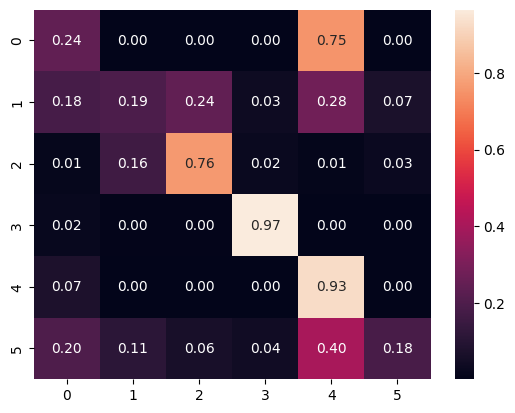

In [43]:
sns.heatmap(attention_weights.detach().numpy(), annot=True, fmt='0.2f')
plt.show()

## Context Vectors

In [22]:
context_vectors = attention_weights @ test_embddings
context_vectors

tensor([[-0.1708,  1.9579,  2.2034],
        [ 0.4153,  0.9945,  0.8605],
        [ 1.3163,  0.0805, -0.3021],
        [-0.8803,  1.1963, -1.4498],
        [-0.1367,  1.9324,  2.4084],
        [ 0.0064,  1.2394,  1.3140]], grad_fn=<MmBackward0>)

# Self-Attention Mechanism

In [23]:
context_vector_output_dim = 2

## Query

In [24]:
W_query = torch.nn.Parameter(torch.rand(embd_dim, context_vector_output_dim), requires_grad=False)
W_query.shape

torch.Size([3, 2])

## Key

In [25]:
W_key = torch.nn.Parameter(torch.rand(embd_dim, context_vector_output_dim), requires_grad=False)
W_key.shape

torch.Size([3, 2])

## Value

In [26]:
W_value = torch.nn.Parameter(torch.rand(embd_dim, context_vector_output_dim), requires_grad=False)
W_value.shape

torch.Size([3, 2])

## Attention scores

In [27]:
queries = test_embddings @ W_query
queries.shape

torch.Size([6, 2])

In [28]:
keys = test_embddings @ W_key
keys.shape

torch.Size([6, 2])

In [29]:
values = test_embddings @ W_value
values.shape

torch.Size([6, 2])

In [31]:
attention_scores_2 = queries @ keys.T
attention_scores_2.shape

torch.Size([6, 6])

In [32]:
attention_scores_2

tensor([[ 3.8654e+00,  2.6045e+00,  2.4314e+00, -2.4971e+00,  5.6755e+00,
          2.5143e-01],
        [ 1.1116e+00,  5.8938e-01,  4.6263e-01, -4.2866e-01,  1.5116e+00,
          5.7789e-02],
        [ 3.7210e-01,  1.4967e-02, -1.1542e-01,  1.8719e-01,  3.6842e-01,
          2.7638e-03],
        [ 8.7482e-01,  8.8241e-01,  9.8456e-01, -1.0965e+00,  1.5056e+00,
          8.3545e-02],
        [ 4.1796e+00,  2.6937e+00,  2.4476e+00, -2.4781e+00,  6.0443e+00,
          2.6073e-01],
        [-1.0393e-01, -8.5707e-02, -8.8618e-02,  9.5578e-02, -1.6443e-01,
         -8.1860e-03]], grad_fn=<MmBackward0>)

## Attention Weights

In [33]:
attention_weights_2 = torch.softmax(attention_scores_2, dim=-1)

In [34]:
attention_weights_2.shape

torch.Size([6, 6])

### Verifying

In [35]:
attention_weights_2.sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)

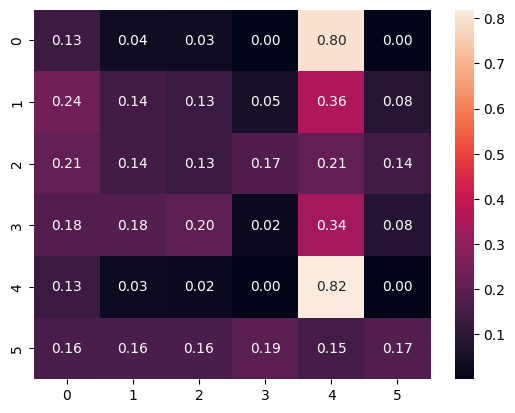

In [44]:
sns.heatmap(attention_weights_2.detach().numpy(), annot=True, fmt='0.2f')
plt.show()

## Context Vectors

In [36]:
context_vectors_2 =  attention_weights_2 @ values
context_vectors_2

tensor([[1.1643, 2.5468],
        [0.9371, 1.7337],
        [0.7295, 1.1580],
        [0.9398, 1.6889],
        [1.1707, 2.5808],
        [0.6496, 0.9417]], grad_fn=<MmBackward0>)

# Masked Attention

## Method 1

In [45]:
attention_scores_2

tensor([[ 3.8654e+00,  2.6045e+00,  2.4314e+00, -2.4971e+00,  5.6755e+00,
          2.5143e-01],
        [ 1.1116e+00,  5.8938e-01,  4.6263e-01, -4.2866e-01,  1.5116e+00,
          5.7789e-02],
        [ 3.7210e-01,  1.4967e-02, -1.1542e-01,  1.8719e-01,  3.6842e-01,
          2.7638e-03],
        [ 8.7482e-01,  8.8241e-01,  9.8456e-01, -1.0965e+00,  1.5056e+00,
          8.3545e-02],
        [ 4.1796e+00,  2.6937e+00,  2.4476e+00, -2.4781e+00,  6.0443e+00,
          2.6073e-01],
        [-1.0393e-01, -8.5707e-02, -8.8618e-02,  9.5578e-02, -1.6443e-01,
         -8.1860e-03]], grad_fn=<MmBackward0>)

In [46]:
attention_scores_2.shape

torch.Size([6, 6])

In [47]:
attention_scores_2.size()

torch.Size([6, 6])

In [48]:
mask_lower = torch.tril(torch.ones(size=attention_scores_2.size()))
mask_lower
# here diagonal is also filled with the desired values

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [58]:
masked_attention_weights_1 =  attention_weights_2 * mask_lower
masked_attention_weights_1

tensor([[1.3053e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.3977e-01, 1.4223e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.0693e-01, 1.4479e-01, 1.2709e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.7872e-01, 1.8009e-01, 1.9946e-01, 2.4892e-02, 0.0000e+00, 0.0000e+00],
        [1.2692e-01, 2.8724e-02, 2.2456e-02, 1.6299e-04, 8.1922e-01, 0.0000e+00],
        [1.5882e-01, 1.6174e-01, 1.6127e-01, 1.9389e-01, 1.4950e-01, 1.7478e-01]],
       grad_fn=<MulBackward0>)

In [59]:
# normalize
masked_attention_weights_1 =  masked_attention_weights_1/masked_attention_weights_1.sum(dim=-1, keepdim=True)
masked_attention_weights_1

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [6.2766e-01, 3.7234e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.3218e-01, 3.0239e-01, 2.6543e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.0648e-01, 3.0881e-01, 3.4203e-01, 4.2685e-02, 0.0000e+00, 0.0000e+00],
        [1.2724e-01, 2.8796e-02, 2.2513e-02, 1.6340e-04, 8.2129e-01, 0.0000e+00],
        [1.5882e-01, 1.6174e-01, 1.6127e-01, 1.9389e-01, 1.4950e-01, 1.7478e-01]],
       grad_fn=<DivBackward0>)

In [57]:
masked_attention_weights_1.sum(dim=-1, keepdim=True)

tensor([[1.0000],
        [2.2093],
        [2.2298],
        [2.2999],
        [1.9160],
        [2.6341]], grad_fn=<SumBackward1>)

## Method 2

* Using softmax and -inf
* Apparently more efficient

In [62]:
mask_upper =  torch.triu(torch.ones(attention_scores_2.size()), diagonal=1)
mask_upper

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [64]:
masked_attention_scores_2 = attention_scores_2.masked_fill(mask_upper.bool(), -torch.inf)
masked_attention_scores_2

tensor([[ 3.8654,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 1.1116,  0.5894,    -inf,    -inf,    -inf,    -inf],
        [ 0.3721,  0.0150, -0.1154,    -inf,    -inf,    -inf],
        [ 0.8748,  0.8824,  0.9846, -1.0965,    -inf,    -inf],
        [ 4.1796,  2.6937,  2.4476, -2.4781,  6.0443,    -inf],
        [-0.1039, -0.0857, -0.0886,  0.0956, -0.1644, -0.0082]],
       grad_fn=<MaskedFillBackward0>)

In [65]:
# apply softmax
masked_attention_weights_2 = torch.softmax(masked_attention_scores_2/keys.shape[-1]**0.5, dim=-1)
masked_attention_weights_2

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5913, 0.4087, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4024, 0.3126, 0.2850, 0.0000, 0.0000, 0.0000],
        [0.2999, 0.3015, 0.3241, 0.0744, 0.0000, 0.0000],
        [0.1855, 0.0649, 0.0545, 0.0017, 0.6934, 0.0000],
        [0.1612, 0.1633, 0.1630, 0.1856, 0.1544, 0.1725]],
       grad_fn=<SoftmaxBackward0>)

# Masked Attention with Dropout

In [66]:
dropout_layer = torch.nn.Dropout(0.5)

In [68]:
masked_attention_weights_2_dropout = dropout_layer(masked_attention_weights_2)
masked_attention_weights_2_dropout

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.1826, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5998, 0.6031, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1090, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3259, 0.3712, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

#### NOTE
* To compensate for the dropped elements, the value of the other elements in scaled by the inverse of the probability of dropout.

# Batch processing

In [70]:
test_batch = torch.stack([test_embddings, test_embddings], dim=0)
test_batch.shape
# batch_size x context_length x embed_dim

torch.Size([2, 6, 3])

In [72]:
W_query = torch.nn.Linear(in_features=test_embddings.shape[-1], out_features=2, bias=False)
W_key = torch.nn.Linear(in_features=test_embddings.shape[-1], out_features=2, bias=False)
W_value = torch.nn.Linear(in_features=test_embddings.shape[-1], out_features=2, bias=False)

In [73]:
W_query.weight.shape

torch.Size([2, 3])

### NOTE
* The weight matrix of the Linear layer is transpose of what is expected.

In [74]:
batch_queries = W_query(test_batch)
batch_queries.shape

torch.Size([2, 6, 2])

In [75]:
batch_keys = W_key(test_batch)
batch_values = W_value(test_batch)

In [78]:
batch_keys.transpose(1,2).shape

torch.Size([2, 2, 6])

In [79]:
batch_attn_sc = batch_queries @ batch_keys.transpose(1,2)
batch_attn_sc.shape

torch.Size([2, 6, 6])

#### NOTE
* The transpose of a tensor of more than 2 dimensions can be controlled using its `.transpose` method.

In [80]:
# mask
mask_upper

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [81]:
batch_attn_sc.masked_fill(mask_upper.bool(), -torch.inf)

tensor([[[-1.2595,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.6768, -0.0113,    -inf,    -inf,    -inf,    -inf],
         [-0.6484, -0.3335, -0.6217,    -inf,    -inf,    -inf],
         [ 0.0233,  0.0760,  0.1851,  0.2254,    -inf,    -inf],
         [-1.4536,  0.7992,  2.5365,  1.2314, -2.7470,    -inf],
         [ 0.0920,  0.1078,  0.2419,  0.3592, -0.1092, -0.1557]],

        [[-1.2595,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.6768, -0.0113,    -inf,    -inf,    -inf,    -inf],
         [-0.6484, -0.3335, -0.6217,    -inf,    -inf,    -inf],
         [ 0.0233,  0.0760,  0.1851,  0.2254,    -inf,    -inf],
         [-1.4536,  0.7992,  2.5365,  1.2314, -2.7470,    -inf],
         [ 0.0920,  0.1078,  0.2419,  0.3592, -0.1092, -0.1557]]],
       grad_fn=<MaskedFillBackward0>)

In [82]:
batch_attn_sc.masked_fill_(mask_upper.bool(), -torch.inf)

tensor([[[-1.2595,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.6768, -0.0113,    -inf,    -inf,    -inf,    -inf],
         [-0.6484, -0.3335, -0.6217,    -inf,    -inf,    -inf],
         [ 0.0233,  0.0760,  0.1851,  0.2254,    -inf,    -inf],
         [-1.4536,  0.7992,  2.5365,  1.2314, -2.7470,    -inf],
         [ 0.0920,  0.1078,  0.2419,  0.3592, -0.1092, -0.1557]],

        [[-1.2595,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.6768, -0.0113,    -inf,    -inf,    -inf,    -inf],
         [-0.6484, -0.3335, -0.6217,    -inf,    -inf,    -inf],
         [ 0.0233,  0.0760,  0.1851,  0.2254,    -inf,    -inf],
         [-1.4536,  0.7992,  2.5365,  1.2314, -2.7470,    -inf],
         [ 0.0920,  0.1078,  0.2419,  0.3592, -0.1092, -0.1557]]],
       grad_fn=<MaskedFillBackward0>)

#### NOTE

* In Pytorch, tensor methods ending in '_' applies the methods in-place.

In [83]:
batch_attn_sc

tensor([[[-1.2595,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.6768, -0.0113,    -inf,    -inf,    -inf,    -inf],
         [-0.6484, -0.3335, -0.6217,    -inf,    -inf,    -inf],
         [ 0.0233,  0.0760,  0.1851,  0.2254,    -inf,    -inf],
         [-1.4536,  0.7992,  2.5365,  1.2314, -2.7470,    -inf],
         [ 0.0920,  0.1078,  0.2419,  0.3592, -0.1092, -0.1557]],

        [[-1.2595,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.6768, -0.0113,    -inf,    -inf,    -inf,    -inf],
         [-0.6484, -0.3335, -0.6217,    -inf,    -inf,    -inf],
         [ 0.0233,  0.0760,  0.1851,  0.2254,    -inf,    -inf],
         [-1.4536,  0.7992,  2.5365,  1.2314, -2.7470,    -inf],
         [ 0.0920,  0.1078,  0.2419,  0.3592, -0.1092, -0.1557]]],
       grad_fn=<MaskedFillBackward0>)

In [85]:
batch_keys.shape[-1]

2

In [86]:
batch_keys.shape[-1]**0.5

1.4142135623730951

In [87]:
batch_attn_wghts = torch.softmax(batch_attn_sc/batch_keys.shape[-1]**0.5, dim=-1)
batch_attn_wghts.shape

torch.Size([2, 6, 6])

In [88]:
batch_attn_wghts

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3845, 0.6155, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3060, 0.3823, 0.3118, 0.0000, 0.0000, 0.0000],
         [0.2319, 0.2407, 0.2600, 0.2675, 0.0000, 0.0000],
         [0.0336, 0.1651, 0.5638, 0.2241, 0.0134, 0.0000],
         [0.1656, 0.1675, 0.1842, 0.2001, 0.1437, 0.1390]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3845, 0.6155, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3060, 0.3823, 0.3118, 0.0000, 0.0000, 0.0000],
         [0.2319, 0.2407, 0.2600, 0.2675, 0.0000, 0.0000],
         [0.0336, 0.1651, 0.5638, 0.2241, 0.0134, 0.0000],
         [0.1656, 0.1675, 0.1842, 0.2001, 0.1437, 0.1390]]],
       grad_fn=<SoftmaxBackward0>)

In [89]:
batch_attn_wghts_dropout = dropout_layer(batch_attn_wghts)
batch_attn_wghts_dropout

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 1.2311, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.6119, 0.7645, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.4637, 0.4814, 0.5199, 0.5350, 0.0000, 0.0000],
         [0.0671, 0.3301, 1.1277, 0.4482, 0.0269, 0.0000],
         [0.3312, 0.0000, 0.3683, 0.0000, 0.2873, 0.0000]],

        [[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 1.2311, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.6119, 0.7645, 0.6236, 0.0000, 0.0000, 0.0000],
         [0.4637, 0.4814, 0.0000, 0.5350, 0.0000, 0.0000],
         [0.0671, 0.3301, 0.0000, 0.0000, 0.0269, 0.0000],
         [0.0000, 0.3350, 0.3683, 0.0000, 0.2873, 0.0000]]],
       grad_fn=<MulBackward0>)

In [93]:
batch_values.shape

torch.Size([2, 6, 2])

In [92]:
batch_attn_wghts_dropout.shape

torch.Size([2, 6, 6])

In [94]:
# context vector
batch_context_vector = batch_attn_wghts_dropout @ batch_values
batch_context_vector

tensor([[[ 0.0000,  0.0000],
         [-0.2316, -0.1170],
         [-0.1988,  0.9619],
         [ 0.2226,  0.3011],
         [ 0.1256, -0.9171],
         [-0.2230,  0.7975]],

        [[-0.1797,  3.3813],
         [-0.2316, -0.1170],
         [-0.2798,  0.3406],
         [ 0.2902,  0.8191],
         [-0.0818,  0.1387],
         [-0.2563,  0.2057]]], grad_fn=<UnsafeViewBackward0>)

In [95]:
batch_context_vector.shape

torch.Size([2, 6, 2])